In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [6]:
X = np.loadtxt('Meltingpoint.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

33 188


In [7]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = X[:n_train,:-1]
Y_train[:] = X[:n_train,-1]

X_test[:] = X[n_train:,:-1]
Y_test[:] = X[n_train:,-1]

print(X_train.shape)
print(X_test.shape)

f = open('Deslist','r')
Deslist = []
for line in f:
    Deslist.append(line.strip('\n\t'))
print(Deslist)

(26, 188)
(7, 188)
['steiger', 'Marsili Partial Charges', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'MolLogP', 'MolMR', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount', 'TPSA', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'ESt

In [11]:
sig = np.zeros((d,d))
row = np.zeros((d,d))

for i in range (n_train):
    row  = X_train[i].reshape((d,1))
    sig += row.dot(row.T)
sig = sig/n
print(sig)
w,v = LA.eig(sig)
print(w)

[[  4.75665273e+05   4.75665273e+05   1.67529133e+03 ...,  -1.77049404e+03
   -2.64247483e+03   4.75665273e+05]
 [  4.75665273e+05   4.75665273e+05   1.67529133e+03 ...,  -1.77049404e+03
   -2.64247483e+03   4.75665273e+05]
 [  1.67529133e+03   1.67529133e+03   5.94332671e+00 ...,  -6.76464531e+00
   -9.51870178e+00   1.67529133e+03]
 ..., 
 [ -1.77049404e+03  -1.77049404e+03  -6.76464531e+00 ...,   8.71576100e+01
    3.76974985e+01  -1.77049404e+03]
 [ -2.64247483e+03  -2.64247483e+03  -9.51870178e+00 ...,   3.76974985e+01
    3.90123967e+01  -2.64247483e+03]
 [  4.75665273e+05   4.75665273e+05   1.67529133e+03 ...,  -1.77049404e+03
   -2.64247483e+03   4.75665273e+05]]
[  5.66036319e+10 +0.00000000e+00j   2.96145659e+06 +0.00000000e+00j
   1.05014091e+06 +0.00000000e+00j   2.41246777e+04 +0.00000000e+00j
   1.04006635e+04 +0.00000000e+00j   9.08706809e+02 +0.00000000e+00j
   3.97321910e+02 +0.00000000e+00j   3.12385065e+02 +0.00000000e+00j
   1.82981145e+02 +0.00000000e+00j   1.17038

In [15]:
K = 10
X_train_k = X_train.dot(v[:,:K])
X_test_k  = X_test.dot(v[:,:K])

In [16]:
converged = False
w = np.zeros(K)
yh = np.zeros(n_train)
rgl= 2
w0 = w0last = 0
ITR = 1000
itr = 0
L = np.zeros(ITR)
while not converged: 
    yh = np.add(X_train_k.dot(w), w0*np.ones(n_train))
    w0last = w0
    wlast = np.copy(w)
    w0 = np.sum(np.subtract(Y_train, yh))/n_train
    yh = np.add(yh,(w0-w0last)*np.ones(n_train))
    for k in range (0,K):
        Xk = X_train_k[:,k]
        ak = Xk.T.dot(Xk)
        ck = Xk.T.dot(Y_train-yh+w[k]*Xk)
        if ck < (-1 * rgl):
            w[k] = (ck + rgl)/ak
        elif ck > rgl:
            w[k] = (ck - rgl)/ak
        else:
            w[k] = 0
        yh = np.add(yh,(w[k]-wlast[k])*X_train_k[:,k])    
    SUB = np.subtract(w, wlast)
    check = np.dot(SUB.T,SUB)
    if (check< 0.0000000001):
        converged = True
        break     
    itr += 1
    if itr == ITR:
        break

/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


ValueError: shapes (26,188) and (10,) not aligned: 188 (dim 1) != 10 (dim 0)

/Users/prguser/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


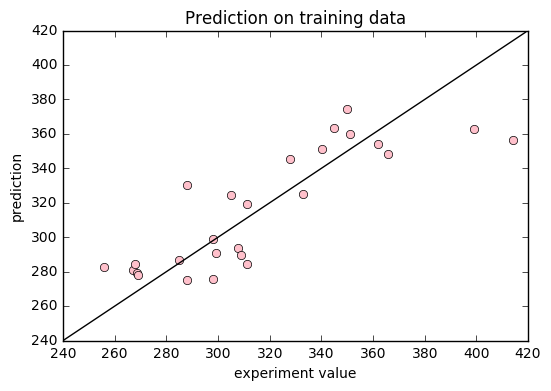

In [22]:
y_train = np.add(X_train_k.dot(w), w0*np.ones(n_train))
plt.plot(Y_train,y_train,"o",color ='pink')
plt.plot(np.arange(240,420),np.arange(240,420),color = 'black')
plt.axis([240,420,240,420])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Prediction on training data')
plt.show()

/Users/prguser/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


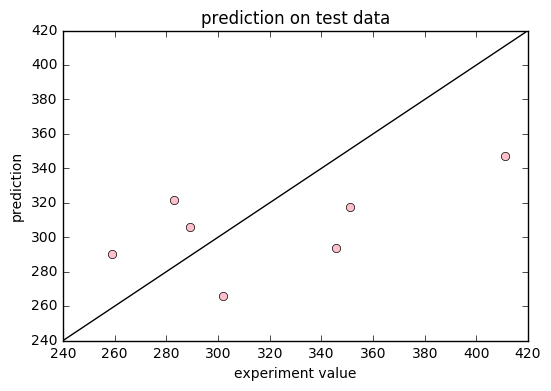

In [21]:
y_test = np.add(X_test_k.dot(w), w0*np.ones(n_test))
plt.plot(Y_test,y_test,"o",color ='pink')
plt.plot(np.arange(240,420),np.arange(240,420),color = 'black')
plt.axis([240,420,240,420])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('prediction on test data')
plt.show()